In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import matplotlib.dates as mdates
from io import StringIO

orig_url='https://drive.google.com/file/d/1fdjRzN7Pgv83C2h4iR6Osk3-2XFpOPs5/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Leroy = pd.read_csv(csv_raw, skiprows=2)
Leroy.columns = ["Data", "Zainteresowanie"]
Leroy['Data'] = pd.to_datetime(Leroy['Data'])

orig_url='https://drive.google.com/file/d/1HWcBDyDTbNzEnlPXZgUtd4bCCq_Ue58c/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Booking = pd.read_csv(csv_raw, skiprows=2)
Booking.columns = ["Data", "Zainteresowanie"]
Booking['Data'] = pd.to_datetime(Booking['Data'])

orig_url='https://drive.google.com/file/d/1F3Q6lDH2GReRGB1jvxzxPKS6rzWCxKwH/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Hodowla = pd.read_csv(csv_raw, skiprows=2)
Hodowla.columns = ["Data", "Zainteresowanie"]
Hodowla['Data'] = pd.to_datetime(Hodowla['Data'])

orig_url='https://drive.google.com/file/d/1eIPH18RVlZQ-UKsFUTlQXA5l87Q4VT5K/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Zachorowania = pd.read_csv(csv_raw)
Zachorowania["Nowe przypadki"] = Zachorowania["Nowe przypadki"].apply(lambda x: x.replace("+", "")).apply(lambda x: int(x))

def toDate(x):
    x = str(x)
    data = ""
    if len(x)== 5:
      data = x[3] + x[4] + "/" + x[0] + x[1] + "/20"
    if len(x)== 4:
      if x[1] == ".":
        data = x[2] + x[3] + "/" + "0" + x[0] + "/20"
      else:
        data = x[3] + "0" + "/" + x[0] + x[1] +  "/20"
    if len(x)== 3:
      data =   x[2] + "0" + "/" + "0" + x[0] + "/20"
    return data

Zachorowania["Data"] = Zachorowania["Data"].apply(lambda x: toDate(x))
Zachorowania['Data'] = pd.to_datetime(Zachorowania['Data']) - pd.to_timedelta(7, unit='d')
df = Zachorowania.groupby([pd.Grouper(key='Data', freq='W-MON')])['Nowe przypadki'].sum().reset_index().sort_values('Data')

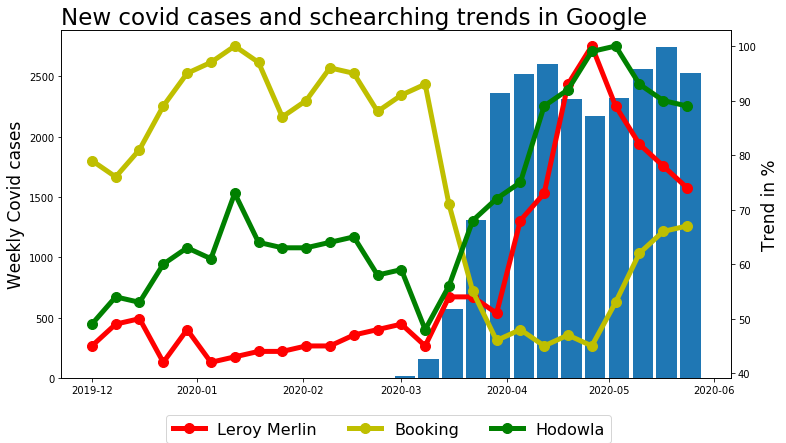

In [52]:
df2 = df[df["Data"] < "2020-05-30"]
df3 = Leroy[Leroy["Data"] < "2020-05-30"]
df4 = Booking[Booking['Data'] < "2020-05-30"]
df5 = Hodowla[Hodowla['Data'] < "2020-05-30"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(df2["Data"], df2["Nowe przypadki"], width = 6)
ax1.set_ylabel('Weekly Covid cases',  fontsize=17)

ax2 = ax1.twinx()
ax2.plot(df3["Data"], df3["Zainteresowanie"], 'r-', label = "Leroy Merlin", linewidth=5, marker = ".", markersize = 20)
ax2.plot(df4["Data"], df4["Zainteresowanie"], 'y-',  label = "Booking", linewidth=5, marker = ".", markersize = 20)
ax2.plot(df5["Data"], df5["Zainteresowanie"], 'g-',  label = "Hodowla", linewidth=5, marker = ".", markersize = 20)
ax2.set_ylabel('Trend in %',  fontsize=17)
fig.legend(loc='center', bbox_to_anchor=(0.45,0.03), ncol=3, prop={'size': 16})
fig.set_size_inches(12, 6.4)
plt.title("New covid cases and schearching trends in Google", fontsize=23, loc = "left")
plt.show()
fig.savefig('demo.png', transparent=True)